In [3]:
import pandas as pd
import seaborn as sns
from datasets import load_dataset

In [4]:
# YELP Dataset
# source: https://huggingface.co/datasets/yelp_review_full/viewer/yelp_review_full/train?f%5blabel%5d%5bvalue%5d=0
yelp = load_dataset("yelp_review_full")
yelp

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 650000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 50000
    })
})

In [5]:
train_ds = yelp["train"]

In [6]:
train_ds[0]

{'label': 4,
 'text': "dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."}

In [7]:
train_ds.features

{'label': ClassLabel(names=['1 star', '2 star', '3 stars', '4 stars', '5 stars'], id=None),
 'text': Value(dtype='string', id=None)}

<Axes: ylabel='count'>

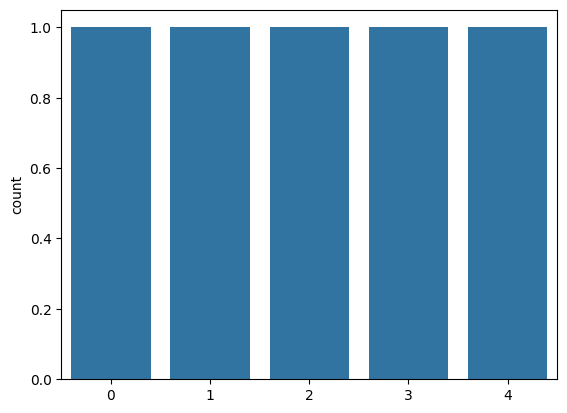

In [8]:
val_count = pd.DataFrame(train_ds["label"]).value_counts()

sns.countplot(val_count.tolist())

<Axes: xlabel='label', ylabel='review_length'>

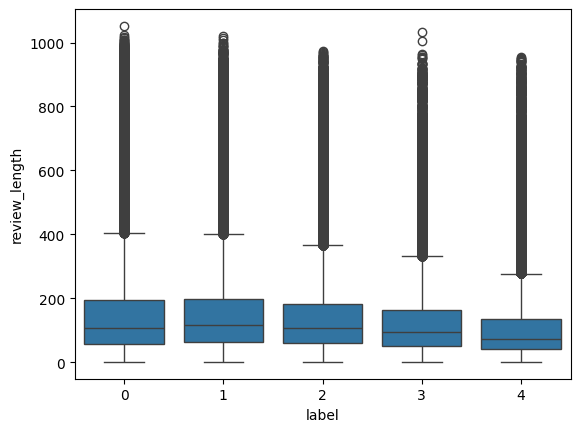

In [9]:
# understanding the texts
# count of words per review / per class
df_review_len_label = pd.DataFrame(
    {
        "review_length": [len(s.split()) for s in train_ds["text"]],
        "label": train_ds["label"],
    }
)
sns.boxplot(x="label", y="review_length", data=df_review_len_label)